In [1]:
# Import the Earth Engine Python Package
import ee
import gdal
import datetime
import numpy as np
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Initialize the Earth Engine object, using the authentication credentials.
ee.Initialize()

In [3]:
# define the Landsat bands that we would like to plot, along with the starting and ending times.
xBand = 'time'
yBandList = [
        'B1',
        u'B2',
        u'B3',
        u'B4',
        u'B5',
        u'B6_VCID_1',
        u'B6_VCID_2',
        u'B7',
        u'B8',
    ]
startTime = datetime.datetime(2000, 1, 1)
endTime = datetime.datetime(2004, 1, 1)

In [4]:
startTime

datetime.datetime(2000, 1, 1, 0, 0)

In [5]:
# contruct a filtered ImageCollection for the date range, and extract band information for a specified point location.
collection = ee.ImageCollection('LE7_L1T').filterDate(startTime, endTime)
point = {'type':'Point', 'coordinates':[-116.88629, 36.56122]};  # death valley (should be stable)
# info = collection.getRegion(point, 500).getInfo()
# type(info)
# print info

In [6]:
info = collection.getRegion(point, 500).getInfo()

In [7]:
type(info)

list

In [14]:
# extract the header column names
header = info[0]
# create a Numpy array of the data
data = np.array(info[1:])
print(header)

['id', 'longitude', 'latitude', 'time', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6_VCID_1', 'B6_VCID_2', 'B7', 'B8']


In [30]:
# extract the time information
iTime = header.index('time')
# convert to Python datetime objects
time = [datetime.datetime.fromtimestamp(int(i) / 1000) for i in (data[0:, iTime])]

In [31]:
iBands = [header.index(b) for b in yBandList]
yData = data[0:,iBands].astype(np.float)
print(iBands)
print(header)

[4, 5, 6, 7, 8, 9, 10, 11, 12]
['id', 'longitude', 'latitude', 'time', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6_VCID_1', 'B6_VCID_2', 'B7', 'B8']


In [32]:
band3 = yData[:,2]
band4 = yData[:,3]
ndvi = (band4 - band3) / (band4 + band3)

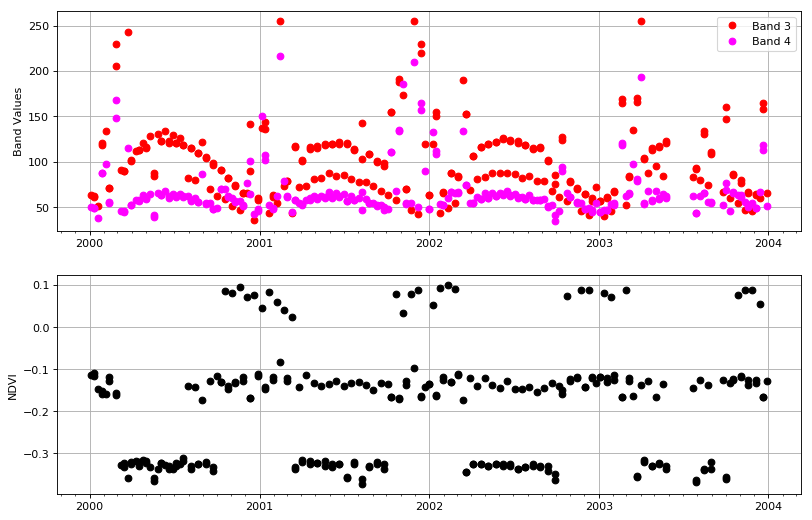

In [37]:
# matplotlib date format object

fig = plt.figure(figsize=(12,8), dpi=80)

# plot the band values
ax1 = fig.add_subplot(211)
ax1.plot(time, yData[:,2], 'o', color="red", label="Band 3")
ax1.plot(time, yData[:,3], 'o', color="magenta",  label="Band 4")
ax1.legend(loc='best')
ax1.grid(True)

#plt.title('Band values as a function of time')
ax1.set_ylabel('Band Values')

# plot NDVI
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(time, ndvi, 'o', color="black", label="NDVI")
ax2.grid(True)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 64.5))

# Format the ticks.
years    = mdates.YearLocator()   # every year
months   = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax2.set_ylabel('NDVI')

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(yearsFmt)
ax2.xaxis.set_minor_locator(months)
plt.show()

In [39]:
# Convert the timestamp to a numpy array
t = np.array([i.toordinal() for i in time])

In [43]:
A = np.array([ t, np.ones(len(t))]).transpose()
b = ndvi
x = np.linalg.lstsq(A,b)[0] # obtaining the parameters

In [44]:
b_hat = A.dot(x)

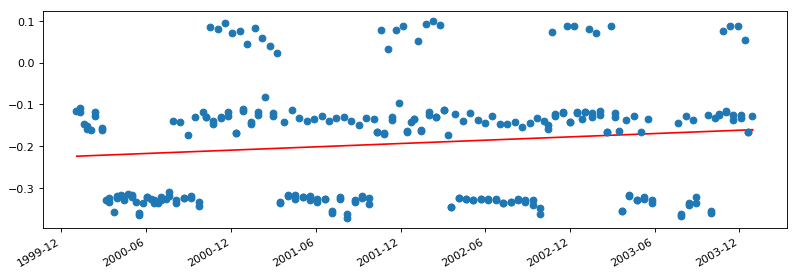

In [46]:
fig2 = plt.figure(figsize=(12,4), dpi=80)
plt.plot(time,b_hat.transpose(),'r-',t,b,'o')
fig2.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
fig2.autofmt_xdate()

In [27]:
int(i)

1071944206233

In [23]:
(data[0:, iTime])

array(['946923274578', '948305671805', '949688071527', '952452858720',
       '953835261401', '955217649129', '956600044368', '957982432548',
       '959364822879', '960747217147', '962129606123', '963511994013',
       '964894376623', '966276770410', '967659159070', '969041540048',
       '970423931677', '971806315002', '973188727052', '974571124950',
       '975953524304', '977335930907', '978718330480', '980100736395',
       '981483128837', '982865528205', '984247924831', '985630315281',
       '987012711892', '988395110022', '989777499659', '991159891705',
       '992542280315', '993924666268', '995307065509', '996689453116',
       '998071834916', '999454223778', '1000836611781', '1002219000389',
       '1003601403500', '1004983808923', '1006366217328', '1007748618756',
       '1009131026857', '1010513430055', '1011895836986', '1013278239516',
       '1014660641830', '1016043038682', '1017425433319', '1018807832863',
       '1020190235639', '1021572628088', '1022955022183', '1024